In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
def manual_dft2(image):
    M, N = image.shape
    dft_result = np.zeros((M, N), dtype=complex)
    for u in range(M):
        for v in range(N):
            sum_val = 0.0j
            for x in range(M):
                for y in range(N):
                    angle = -2j * np.pi * ((u * x) / M + (v * y) / N)
                    sum_val += image[x, y] * np.exp(angle)
            dft_result[u, v] = sum_val
    
    return dft_result

In [4]:
def builtin_fft2(image):
    fft_rows = np.fft.fft(image, axis=1)
    fft_2d = np.fft.fft(fft_rows, axis=0)
    
    return fft_2d

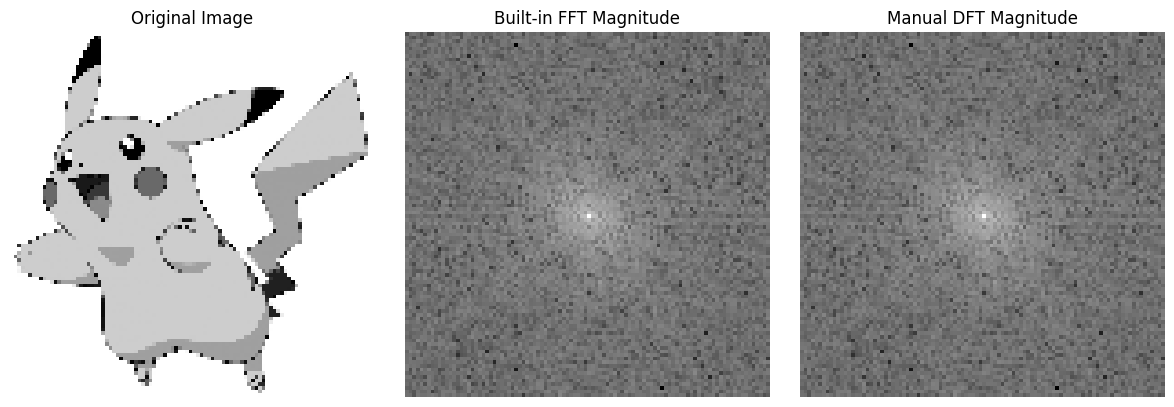

In [7]:
image = cv2.imread('../images/img7.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (100, 100))
manual_result = manual_dft2(image)
builtin_result = builtin_fft2(image)
manual_mag = np.log1p(np.abs(np.fft.fftshift(manual_result)))
builtin_mag = np.log1p(np.abs(np.fft.fftshift(builtin_result)))

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Built-in FFT Magnitude")
plt.imshow(builtin_mag, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Manual DFT Magnitude")
plt.imshow(manual_mag, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()